In [6]:
import tomotopy as tp
import pandas as pd
myfile = "/Volumes/时伟SSD512G/扶贫数据-已清洗完成-467884.xlsx"

In [7]:
print(tp.isa)

avx2


In [8]:
df = pd.read_excel(myfile) #读取excel文件
df

,Unnamed: 0,date,time,username,place,clean_tweet,mentions,replies_count,retweets_count,likes_count,hashtags
0,0,2013-01-01,14:25:30,chinese_bagelco,NaN,poor richard lewis old mother yell richard get...,[],0,0,0,[]
1,1,2013-01-01,17:44:50,ashleighelle,NaN,poor chinese girl last night get dance look mi...,[],0,0,1,[]
2,2,2013-01-01,19:06:17,rotipeeta,NaN,awww poor help chinese restaurant block tmpt k...,[],0,0,0,[]
3,3,2013-01-01,21:07:13,colr69,NaN,poor attempt get chinese lantern airborne,[],1,0,0,[]
4,4,2013-01-01,22:54:19,venaamori_iv,NaN,dang chinese poor forget many word rip,[],0,0,0,[]
...,...,...,...,...,...,...,...,...,...,...,...
467879,467879,2021-12-31,17:25:30,redand51ue,NaN,shed crocodile tear chinese people force pover...,[],0,0,0,"['ccp', 'emperorxi', 'ccp', 'commonprosperity']"
467880,467880,2021-12-31,20:06:07,ray44758650,NaN,wrong deng wisely take ccp way chinese people ...,[],0,0,0,[]
467881,467881,2021-12-31,21:52:54,chineseemb_uga,NaN,excerpt president jinping 2022 new year addres...,[],1,2,9,[]
467882,467882,2021-12-31,23:29:44,raggieisafoodie,NaN,affected pandemic thousand people die whole wo...,[],0,0,0,[]


In [9]:
df = df.drop(columns = ['Unnamed: 0'])
df

,date,time,username,place,clean_tweet,mentions,replies_count,retweets_count,likes_count,hashtags
0,2013-01-01,14:25:30,chinese_bagelco,NaN,poor richard lewis old mother yell richard get...,[],0,0,0,[]
1,2013-01-01,17:44:50,ashleighelle,NaN,poor chinese girl last night get dance look mi...,[],0,0,1,[]
2,2013-01-01,19:06:17,rotipeeta,NaN,awww poor help chinese restaurant block tmpt k...,[],0,0,0,[]
3,2013-01-01,21:07:13,colr69,NaN,poor attempt get chinese lantern airborne,[],1,0,0,[]
4,2013-01-01,22:54:19,venaamori_iv,NaN,dang chinese poor forget many word rip,[],0,0,0,[]
...,...,...,...,...,...,...,...,...,...,...
467879,2021-12-31,17:25:30,redand51ue,NaN,shed crocodile tear chinese people force pover...,[],0,0,0,"['ccp', 'emperorxi', 'ccp', 'commonprosperity']"
467880,2021-12-31,20:06:07,ray44758650,NaN,wrong deng wisely take ccp way chinese people ...,[],0,0,0,[]
467881,2021-12-31,21:52:54,chineseemb_uga,NaN,excerpt president jinping 2022 new year addres...,[],1,2,9,[]
467882,2021-12-31,23:29:44,raggieisafoodie,NaN,affected pandemic thousand people die whole wo...,[],0,0,0,[]


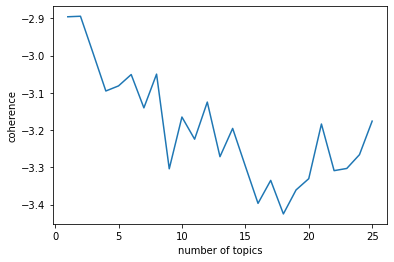

In [21]:
def find_k(docs, min_k, max_k, min_df):
    #min_df 词语最少出现在2个文档中
    import matplotlib.pyplot as plt
    scores = []
    for k in range(min_k, max_k):
        #seed随机种子，保证在大邓这里运行结果与你运行的结果一样
        mdl = tp.LDAModel(min_df=min_df, k=k, rm_top=10, seed=555)
        for tweet in docs:
            mdl.add_doc(tweet.strip().split())
        for i in range(0, 100, 10):
            mdl.train(10)
        coh = tp.coherence.Coherence(mdl)
        scores.append(coh.get_score())

    #x = list(range(min_k, max_k - 1))  # 区间最右侧的值。注意：不能大于max_k
    #print(x)
    #print()
    plt.plot(range(min_k, max_k), scores)
    plt.xlabel("number of topics")
    plt.ylabel("coherence")
    plt.show()
    
    
find_k(docs = df['clean_tweet'], min_k=1, max_k=26, min_df=2)

In [22]:
#初始化LDA
mdl = tp.LDAModel(k=7, rm_top=10, min_df=2, seed=555)
for tweet in df['clean_tweet']:
    mdl.add_doc(tweet.strip().split()) #传入的是一个一个的词['today','is','a','nice','day','and','I', 'love','you']

#训练
for i in range(0, 100, 10):
    mdl.train(10)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, mdl.ll_per_word))

#查看每个topic feature words
for k in range(mdl.k):
    print('Top 10 words of topic #{}'.format(k))
    print(mdl.get_topic_words(k, top_n=10))
    print('#'*100)
    
mdl.summary()

Iteration: 0	Log-likelihood: -9.181786624105117
Iteration: 10	Log-likelihood: -9.093932764714541
Iteration: 20	Log-likelihood: -8.883528530409595
Iteration: 30	Log-likelihood: -8.75547769155644
Iteration: 40	Log-likelihood: -8.688908018098383
Iteration: 50	Log-likelihood: -8.656585627650225
Iteration: 60	Log-likelihood: -8.639110260322289
Iteration: 70	Log-likelihood: -8.629042889064964
Iteration: 80	Log-likelihood: -8.620026803960764
Iteration: 90	Log-likelihood: -8.613760445348632
Top 10 words of topic #0
[('alleviation', 0.013658647425472736), ('help', 0.012165931984782219), ('million', 0.011105699464678764), ('rural', 0.010289913043379784), ('year', 0.01014093030244112), ('lift', 0.008492001332342625), ('say', 0.007997321896255016), ('via', 0.00788884051144123), ('fight', 0.007854125462472439), ('new', 0.007721054367721081)]
####################################################################################################
Top 10 words of topic #1
[('million', 0.015572975389659405